## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
# Generate 50 points equally distributed between 0 and 20
X_org = np.linspace(0, 20, 50).reshape(50,1)

y = -2*X_org + 1
m = X_org.shape[0]

X = (X_org-np.mean(X_org)) / np.std(X_org) ##########################################

X = np.block([np.ones((m, 1)), X])


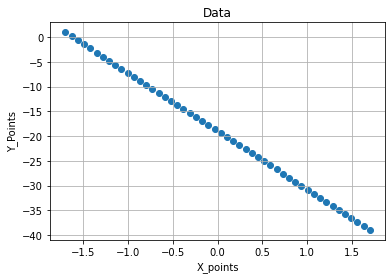

In [3]:
plt.scatter(X[:,1], y)
plt.xlabel("X_points")
plt.ylabel("Y_Points")
_ = plt.title("Data")
plt.grid()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def compute_cost(X, y, theta):
    diff = (X @ theta) - y
    return (diff.T @ diff)/(2*m)

In [5]:
def create_mini_batches(X, y, batch_size, shuff):
    m = X.shape[0]
    n_minibatches = m // batch_size
    mini_batches = []

#     print(n_minibatches)
#     print(m)
    if shuff:
        X, y = shuffle(X,y)
    t=0
    for t in range(0, n_minibatches):
        X_mini = X[t*batch_size: (t+1)*batch_size]
        y_mini = y[t*batch_size: (t+1)*batch_size]
        mini_batches.append((X_mini, y_mini))
    
    if m % batch_size != 0:
        X_mini = X[(t+1)*batch_size: m]
        y_mini = y[(t+1)*batch_size: m]
        mini_batches.append((X_mini, y_mini))
        
    return mini_batches



In [6]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def gradient_descent(X, y, theta, alpha, iters, batch_size, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]
    epoch_costs = [0]

    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        epoch_cost = 0
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            h = (x_mini @ theta)
            H.append(h)
            
            y_hat = h - y_mini
            
            grad = (x_mini.T @ y_hat) / m
            grads.append(np.linalg.norm(grad))
        
            theta = theta - (alpha*grad)
            thetas.append(theta.T)

            loss = compute_cost(x_mini, y_mini, theta)[0,0]
            cost.append(loss)
            
            epoch_cost += loss  
            
        epoch_costs.append(epoch_cost)
        if np.abs(epoch_costs[i+1] - epoch_costs[i]) < 0.0001:
            iters = i
            break
        
    return theta, cost[1:], H, thetas, iters, epoch_costs[1:]
    


In [7]:
alpha = 0.1
iters = 100
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_size)
# cost

In [9]:
print('Epochs: ', len(epoch_costs))
print("Cost: ", cost)

Epochs:  64
Cost:  [202.4090816326531, 163.95135612244897, 132.80059845918368, 107.56848475193878, 87.13047264907038, 70.57568284574704, 57.166303105055114, 46.30470551509464, 37.506811467226655, 30.380517288453593, 24.60821900364741, 19.932657392954408, 16.145452488293078, 13.077816515517389, 10.593031377569083, 8.58035541583096, 6.950087886823079, 5.629571188326695, 4.55995266254462, 3.6935616566611476, 2.9917849418955296, 2.4233458029353825, 1.9629101003776608, 1.5899571813059072, 1.2878653168577838, 1.0431709066548067, 0.8449684343903925, 0.6844244318562176, 0.5543837898035371, 0.4490508697408653, 0.36373120449010143, 0.2946222756369814, 0.2386440432659555, 0.19330167504542398, 0.15657435678679352, 0.12682522899730295, 0.10272843548781588, 0.08321003274513032, 0.06740012652355544, 0.05459410248408025, 0.04422122301210501, 0.03581919063980472, 0.02901354441824198, 0.023500970978776233, 0.019035786492808383, 0.015418987059174827, 0.012489379517931531, 0.010116397409524408, 0.00819428

#### Try your function with any input parameterss of your choice.

In [10]:
X_test = 10

# Line equation
y_actual = -2*X_test + 1

# Normalize test input
X_test = (10 - np.mean(X_org)) / np.std(X_org)
X_test = np.array([1, X_test]).reshape((1,2))

y_pred = X_test @ theta
print("Predicted Value:", y_pred)
print("Actual Value:", y_actual)

Predicted Value: [[-18.97759865]]
Actual Value: -19


#### Calculate r2 score

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y, X@theta)

0.9999949938558966

#### Plot loss vs. epochs

Text(0.5, 1.0, 'Cost vs Epochs')

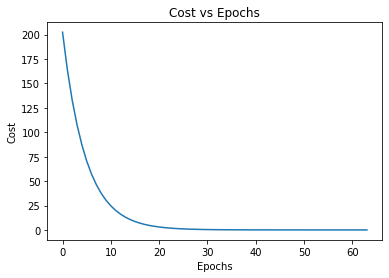

In [13]:
# plt.plot(np.arange(len(cost[1:])), cost[1:])
plt.plot(cost)

plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.title("Cost vs Epochs")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0.5, 1.0, 'theta 0 vs Cost')

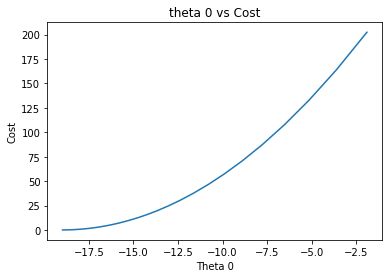

In [14]:
th_0 = [t[0,0] for t in thetas]
plt.plot(th_0, cost)
plt.xlabel('Theta 0')
plt.ylabel("Cost")
plt.title("theta 0 vs Cost")

Text(0.5, 1.0, 'theta 0 vs Cost')

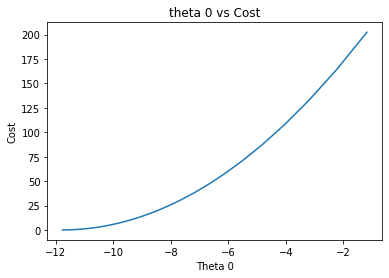

In [15]:
th_1 = [t[0,1] for t in thetas]
plt.plot(th_1, cost)
plt.xlabel('Theta 0')
plt.ylabel("Cost")
plt.title("theta 0 vs Cost")

#### Plot all regression lines till converge

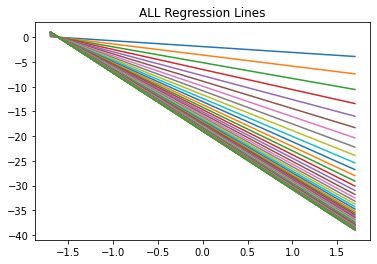

In [18]:
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    plt.plot(X[:,1], f)
plt.title("ALL Regression Lines")
plt.show()

#### Plot the best regression line

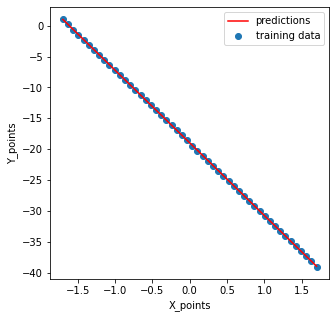

In [19]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

- ##  Decreasing alpha and Increasing Iters
- ## takes more time to converge

In [20]:
alpha = 0.05
iters = 500
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_size)
# cost

In [21]:
print('Epoch: ', len(epoch_costs))

Epoch:  122


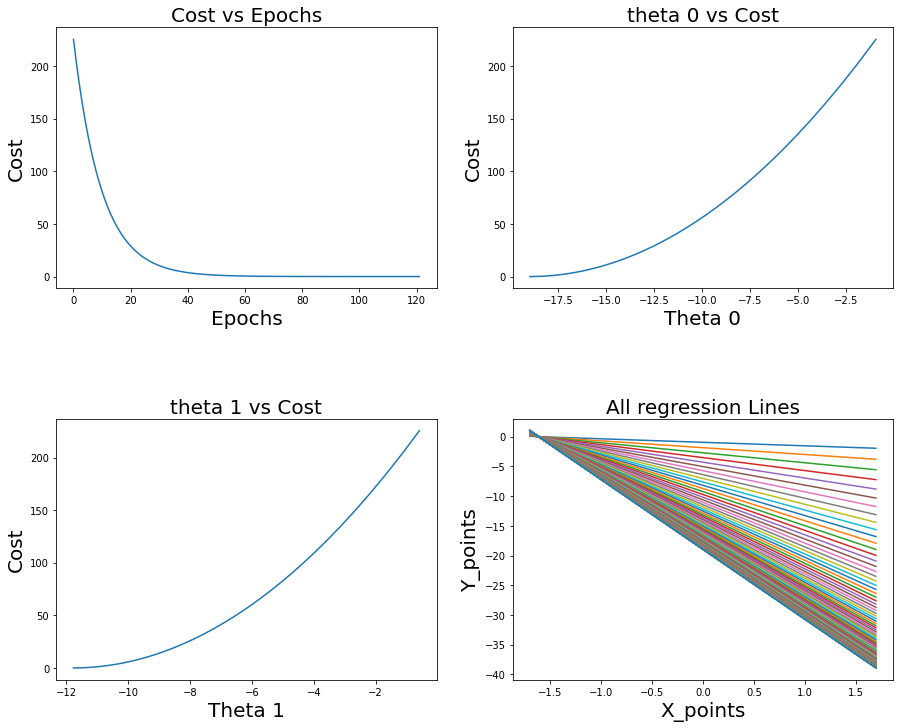

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

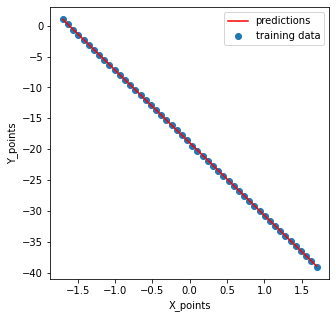

In [23]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [24]:
alpha = 0.5
iters = 50
n = X.shape[1]
batch_size = 8
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_size, shuff=True)
# cost

In [26]:
print('Epochs: ', len(epoch_costs))

Epoch:  16


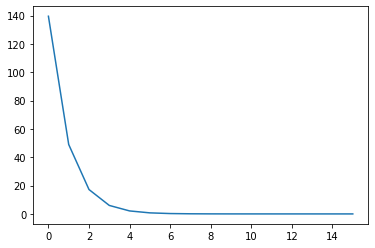

In [28]:
plt.plot(epoch_costs)

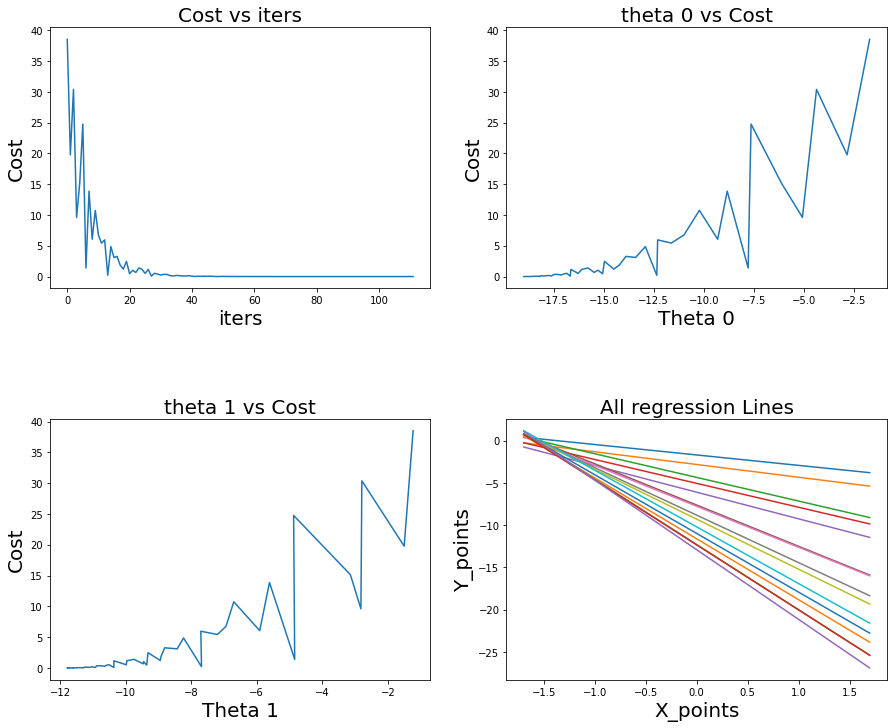

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('iters', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs iters", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

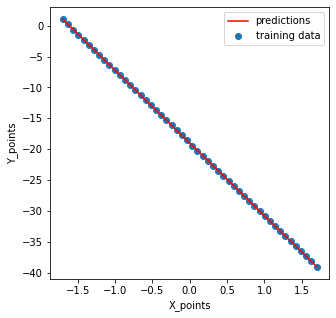

In [30]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

- ## Without Shuffle

In [32]:
alpha = 0.5
iters = 50
n = X.shape[1]
batch_size = 8
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_size, shuff=False)
# cost


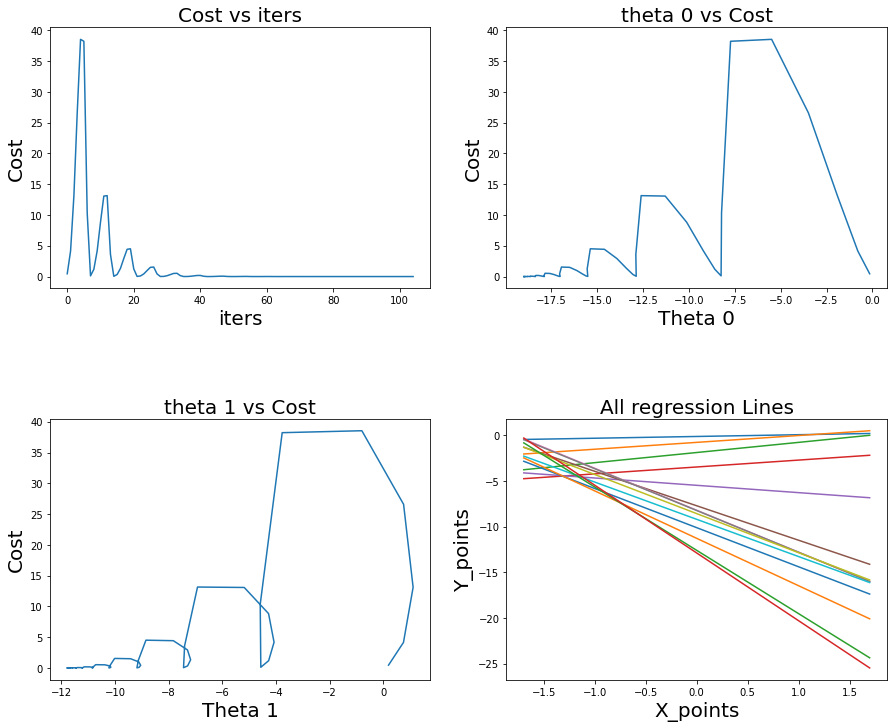

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('iters', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs iters", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

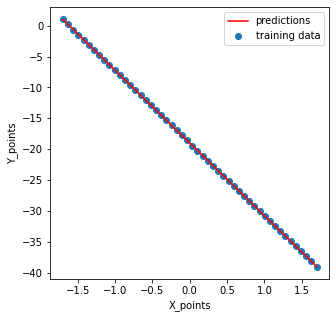

In [34]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

- ## Different Batch Size

15
15
15
14


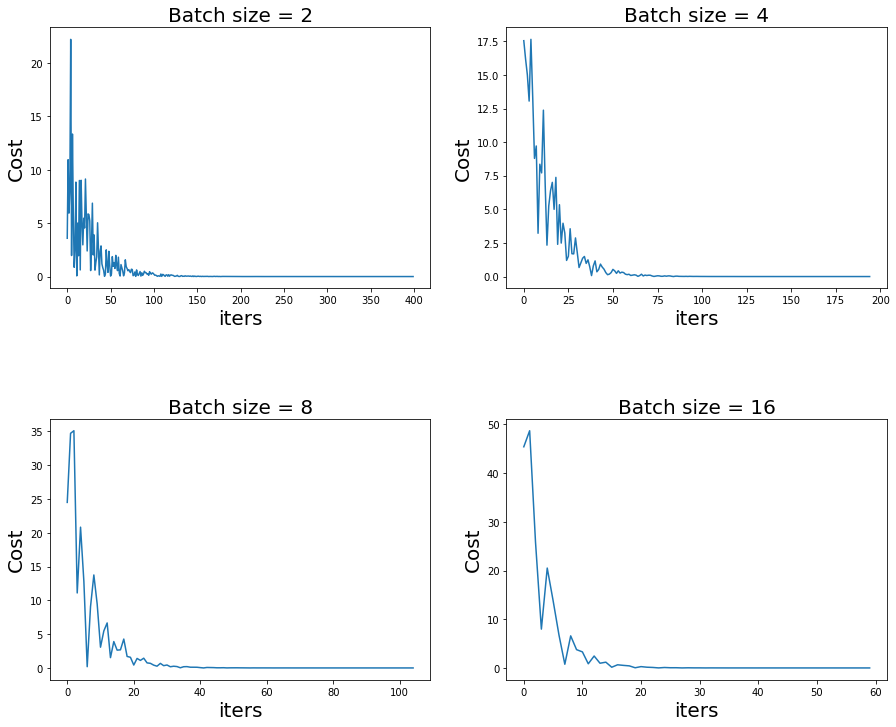

In [36]:
alpha = 0.5
iters = 50
n = X.shape[1]
batch_sizes = [2,4,8,16]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

k=[(0,0),(0,1),(1,0),(1,1)] # For plotting
for i in range(len(batch_sizes)):
    theta = np.zeros((n,1))
    theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_sizes[i], shuff=True)
    print(iters)
    # plot Cost vs Epochs
    ax[k[i][0], k[i][1]].plot(cost)
    ax[k[i][0], k[i][1]].set_xlabel('iters', fontsize = 20)
    ax[k[i][0], k[i][1]].set_ylabel("Cost", fontsize = 20)
    ax[k[i][0], k[i][1]].set_title(f"Batch size = {batch_sizes[i]}", fontsize = 20)


## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [64]:
alpha = 0.9
iters = 50
n = X.shape[1]
batch_size = 1
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_size, shuff=True)
# cost

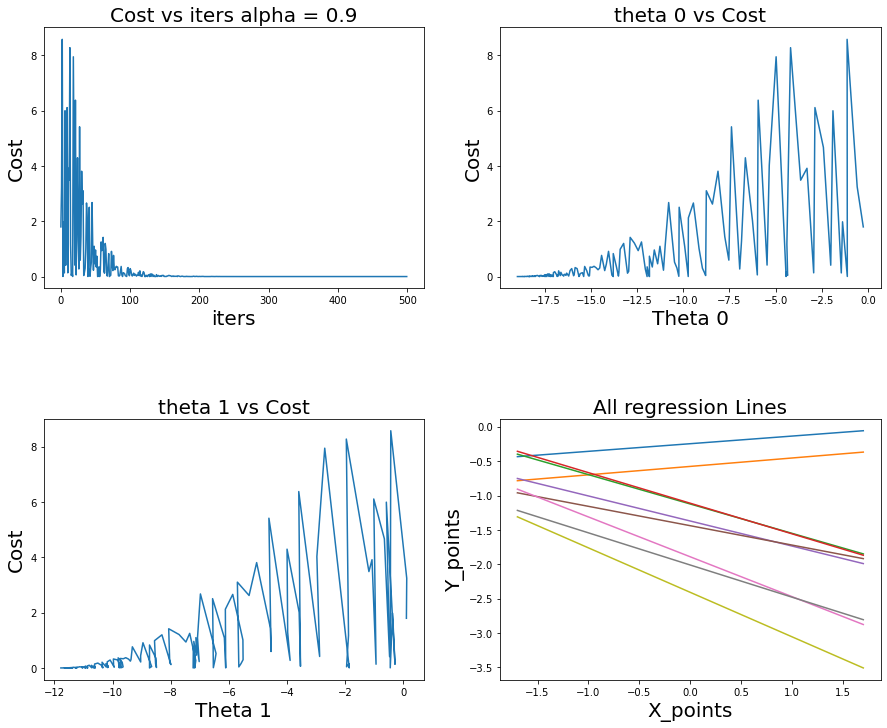

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('iters', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title(f"Cost vs iters alpha = {alpha}", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

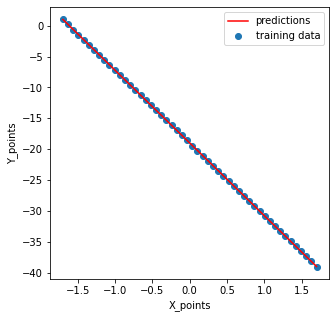

In [66]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

In [67]:
y_pred = X@theta
print("Accuracy:", r2_score(y, y_pred))

Accuracy: 0.9999999622291333


8
8
8
8


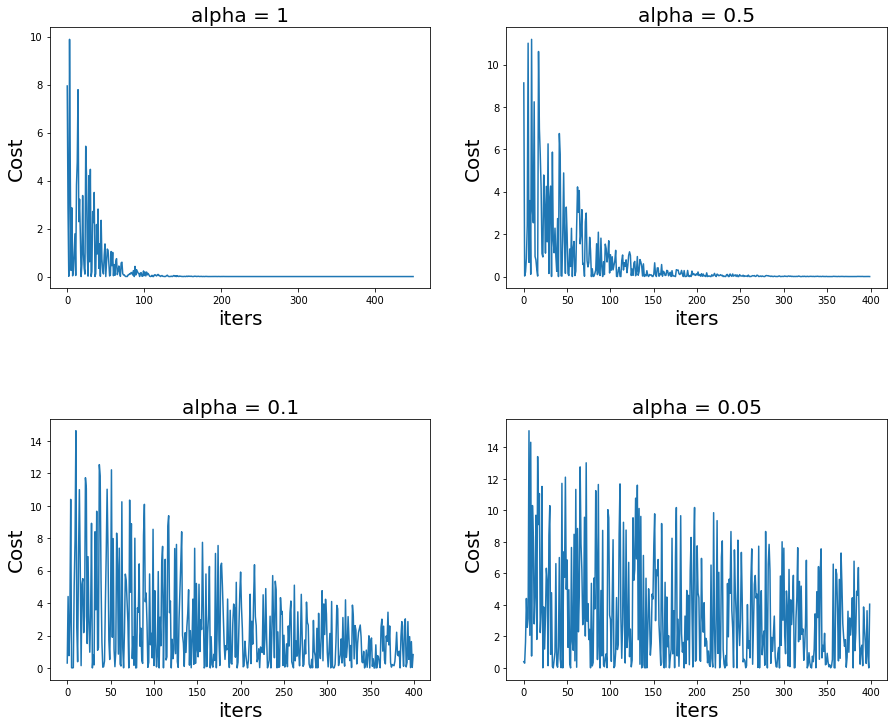

In [68]:
alphas = [1, 0.5, 0.1, 0.05]
iters = 50
n = X.shape[1]
batch_size = 1



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

k=[(0,0),(0,1),(1,0),(1,1)] # For plotting
for i in range(len(alphas)):
    theta = np.zeros((n,1))
    theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alphas[i], iters, batch_size, shuff=True)
    print(iters)
    # plot Cost vs Epochs
    ax[k[i][0], k[i][1]].plot(cost)
    ax[k[i][0], k[i][1]].set_xlabel('iters', fontsize = 20)
    ax[k[i][0], k[i][1]].set_ylabel("Cost", fontsize = 20)
    ax[k[i][0], k[i][1]].set_title(f"alpha = {alphas[i]}", fontsize = 20)


# Without Shuffle

In [74]:
alpha = 0.9
iters = 50
n = X.shape[1]
batch_size = 1
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters, epoch_costs = gradient_descent(X, y, theta, alpha, iters, batch_size, shuff=False)
# cost

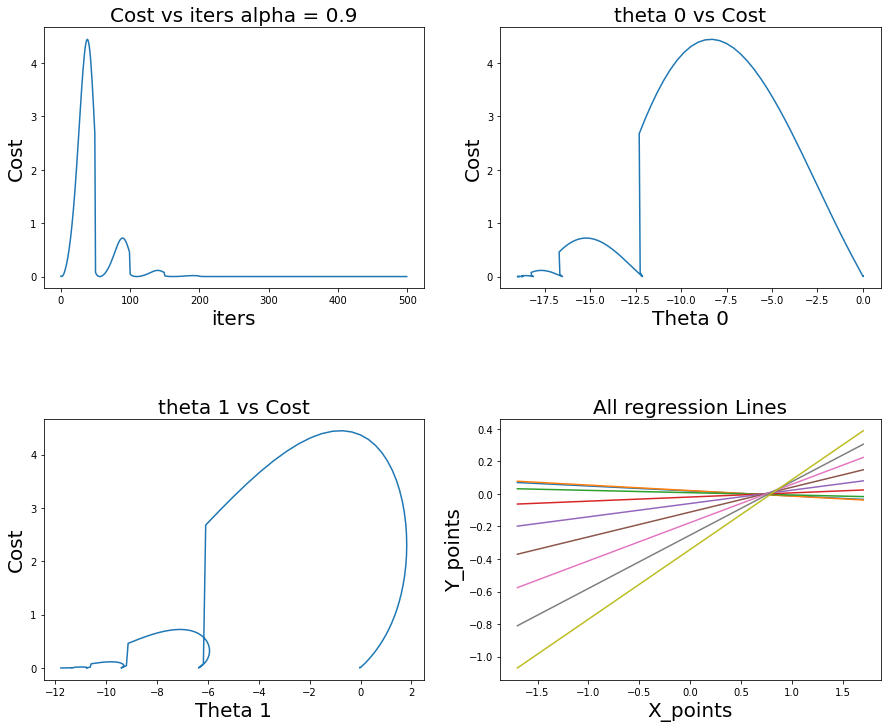

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('iters', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title(f"Cost vs iters alpha = {alpha}", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

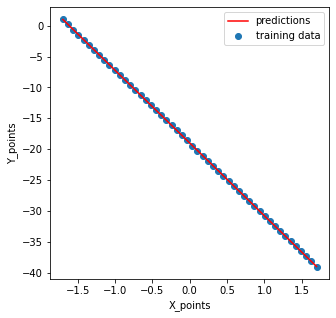

In [76]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

In [77]:
print("Accuracy:", r2_score(y, X@theta))

Accuracy: 0.9999999379579636
